In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print("adding following folder to path: ",module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

adding following folder to path:  /home/enis/projects/nna/src


In [2]:
import numpy as np 
from numpy import linspace
import pandas as pd


import datetime
from scipy import stats
import time
import copy
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import precision_recall_fscore_support


import csv 
from pathlib import Path
from os import listdir
import pickle

from tabulate import tabulate


from datetime import datetime,timedelta

import itertools


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import ListedColormap
from matplotlib import cm

from pytz import timezone




In [3]:
from pre_process_func import read_queue
from fileUtils import read_file_properties
from labeling_utils import load_labels
from visUtils import get_cycle,createTimeIndex,file2TableDict,reverseTableDict

In [4]:
dataFlder="/home/enis/projects/nna/data/"
resultsFlder="/home/enis/projects/nna/results/"

clippingResultsPath=dataFlder+"clipping_results/"
tag_name="clipping"

resultsVisPath=resultsFlder+"vis/clippingv2/"

file_properties_dfPath="../../data/realdata_v2No_stinchcomb.pkl"

In [5]:
file_properties_df=pd.read_pickle(file_properties_dfPath)


In [6]:
all_possible_sites=sorted(pd.unique(file_properties_df.site_id.values))
len(all_possible_sites)
iteratorSelected=iter(zip(*[iter(all_possible_sites)]*10))


## run below here until error

In [7]:
# PARAMS
# FREQS to reduce results 
freq="2H"

# clipping threshold
threshold=0.01  # if x <= then 0

# possible places to pick
# sorted(pd.unique(file_properties_df.site_id.values))
# areas to be visualized

# delete older than 2016
fromtime=datetime(2016, 1, 1, 0)

# selected_areas=["15","21","22","27","31","35","37","48",]
selected_areas=next(iteratorSelected)

id2name={}
id2name['09-USGS']="USGS"
id2name['19-Itkillik2']="Itkilik 2"
id2name['01-Itkillik']="Itkilik 1"
id2name['02-Colville2']="Colville 2"
id2name['03-OceanPt']="Ocean Pt"
id2name['04-Colville4']="Colville 4"
id2name['05-Colville5']="Colville 5"

In [8]:

#important to keep them in order
file_properties_df.sort_values(by=['timestamp'],inplace=True)

file_properties_df=file_properties_df[file_properties_df.timestamp>=fromtime]


In [9]:
# example of data
# file_properties_df.loc[Path('/tank/data/nna/real/ivvavik/AR03/2018/INP-AR-03_20180513_060000.flac')]
# sorted(pd.unique(file_properties_df.site_id.values))


In [10]:
globalindex,all_start,all_end=createTimeIndex(selected_areas,file_properties_df,freq)

selected_tag_name="Clipping"
model_tag_names=[selected_tag_name]
weather_cols=[]

globalcolumns=model_tag_names #selected_areas+weather_cols


In [11]:
print(" Duration of selected data period:",(all_end-all_start).days,"days")
print(" Starts: {} \n Ends:   {}".format(all_start,all_end))

 Duration of selected data period: 62 days
 Starts: 2019-05-04 00:00:00 
 Ends:   2019-07-05 23:59:59


In [12]:

gathered_results_perTag={"Clipping":{}}

gathered_results={}
selected_areas_files={}
for i,area in enumerate(selected_areas):
    to_be_deleted=[]
    fileName=(clippingResultsPath+area+"_1.pkl")
    resultsDict=np.load(fileName,allow_pickle=True)
    resultsDict=resultsDict[()]
    gathered_results_perTag["Clipping"].update(resultsDict)


df_dict,no_result_paths = file2TableDict(selected_areas,model_tag_names,globalindex,globalcolumns,
                                file_properties_df,freq,dataFreq="10S",dataThreshold=0.01,channel=2,
                                gathered_results_perTag=gathered_results_perTag,result_path=None)

print("{} number of files do not have results".format(len(no_result_paths)))

df_dict_reverse=reverseTableDict(selected_areas,df_dict,model_tag_names)



0 number of files do not have results


In [14]:
df_dict.keys()

dict_keys(['11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

In [15]:
df_count,df_sums=df_dict_reverse[selected_tag_name]

df_freq=df_sums/df_count
# del df_freq['UMIAT']

df_freq=df_freq*100
df_freq=df_freq.dropna(how='all')
# df_freq=pd.concat([df_freq, normal_weather], axis=1, join='inner')

In [16]:

# cord_list=sorted(list(cord.items()),key=lambda x: x[1][0],reverse=True)

# cord_list=list(filter(lambda x: x[0] in df_freq.columns ,cord_list))

cord_list=[(i,(0,0)) for i in df_freq.columns]

In [17]:
# (datetime.datetime(2019, 5, 4, 0, 0),
#  datetime.datetime(2019, 6, 24, 23, 59, 59))

In [18]:
months=[df_freq.loc['2019-05':'2019-05'],df_freq.loc['2019-06':'2019-06']]
# months2=[df_freq.loc['2016-06-01':'2016-06-30'],df_freq.loc['2016-07-01':'2016-07-31'],df_freq.loc['2016-08-01':'2016-08-31']]

# make them all same month for aligning 
for i,month in enumerate(months):
    months[i]=month.rename(index=lambda x: x.replace(month=7))
    


In [19]:
# linestyle_str = [
#      ('solid', 'solid'),      # Same as (0, ()) or '-'
#      ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
#      ('dashed', 'dashed'),    # Same as '--'
#      ('dashdot', 'dashdot'),  # Same as '-.
#      ('densely dotted',        (0, (1, 1))),
#      ('densely dashed',        (0, (5, 1))),
#     ('densely dashdotted',    (0, (3, 1, 1, 1))),
#      ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


/scratch/enis/conda/envs/speechEnv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


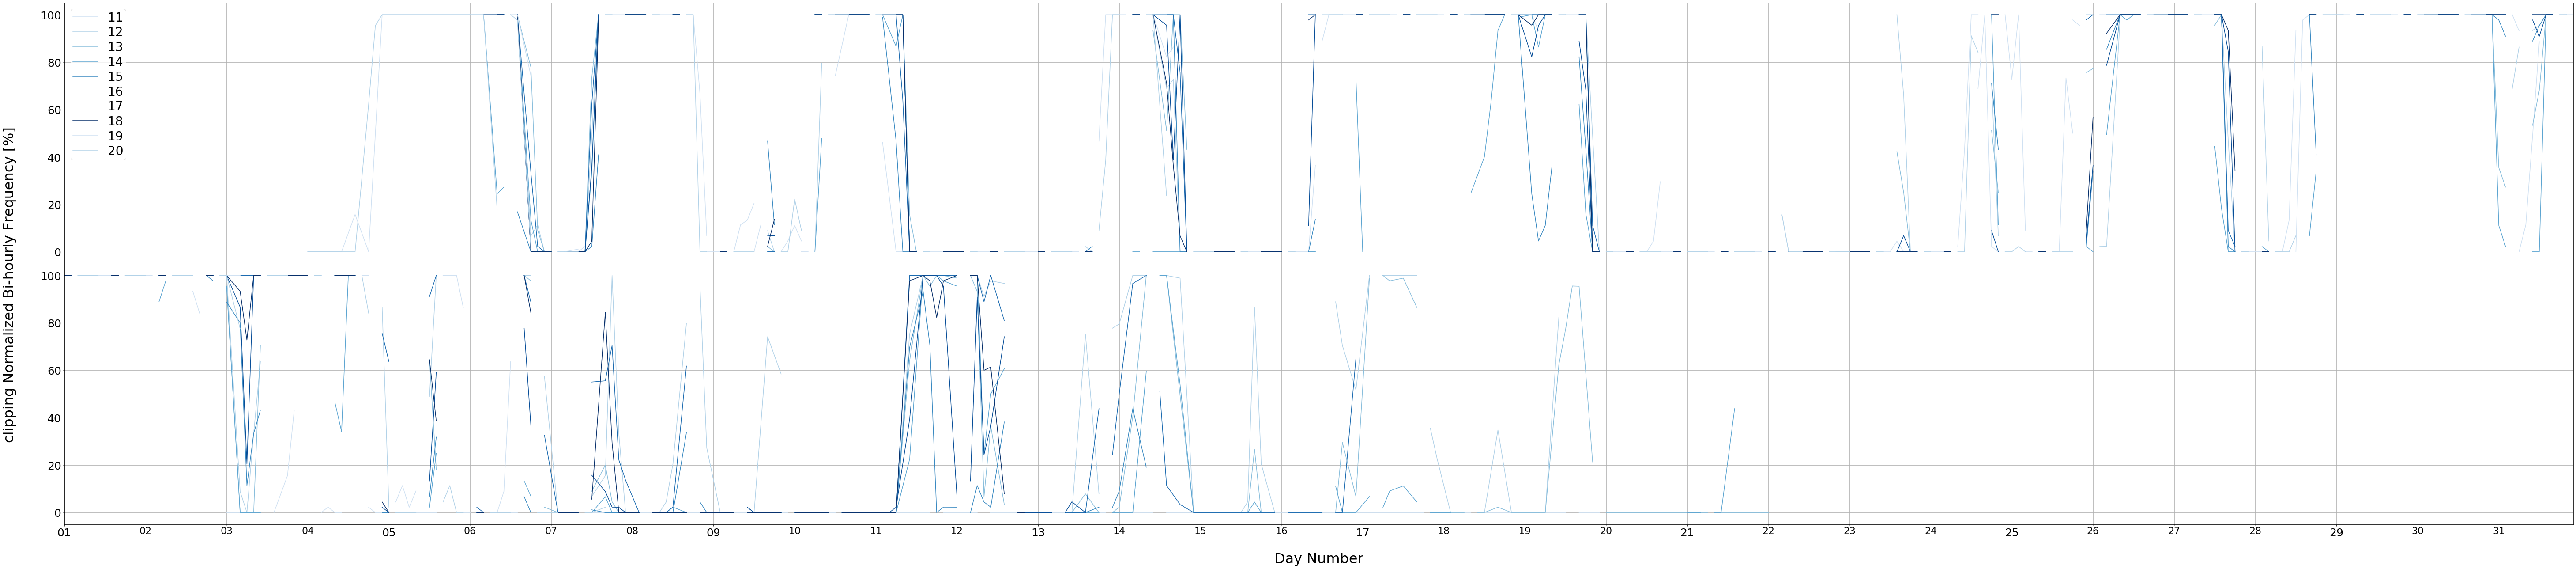

In [20]:

plt.rcParams["axes.prop_cycle"] = get_cycle("Blues",N=8)


fig, ax = plt.subplots(figsize=(80,18),nrows=len(months),sharex=True, sharey=True,gridspec_kw={'hspace': 0})

markers = itertools.cycle((',', '+', '.', 'o', '*')) 

weather_colors=["firebrick","darkorange","green","seagreen","lightpink"]

for monthi,month in enumerate(months):
    # for col in df_freq.columns:
    for i,(col,(lat,long)) in enumerate(cord_list):
        if col in weather_cols:
            index=weather_cols.index(col)
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ",color=weather_colors[index])
        else:
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ")
        

ax[0].legend( labels=[id2name.get(x[0],x[0]) for x in cord_list],loc='upper left', 
            borderpad=0.2, labelspacing=0.2, fontsize=28, 
            frameon=True) # frameon=False to remove frame.


# fig.text(0.04, 0.5,f'{tag_name} Normalized Bi-hourly Frequency [%]',fontsize=32,va='center', rotation='vertical')


ax[-1].set_xlabel('Day Number', fontsize=32)


for an_ax in ax:
    
    locator=dates.DayLocator()
    an_ax.xaxis.set_minor_locator(locator)

    an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n'))

    an_ax.xaxis.grid(True, which="minor")
    an_ax.xaxis.grid(True, which="major")


    an_ax.xaxis.set_major_locator(dates.AutoDateLocator())
    an_ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n'))

    an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
    an_ax.yaxis.grid()
    an_ax.tick_params(labelsize=22,which="minor")
    an_ax.tick_params(labelsize=25,which="major")
    
plt.tight_layout()
plt.margins(x=0)

fig.text(-0.01, .5, f'{tag_name} Normalized Bi-hourly Frequency [%]', ha='center', va='center', rotation='vertical',fontsize=32)

plt.show()

selected_areas_names=",".join(selected_areas)
visualFileName=f"{resultsVisPath}{tag_name}_threshold:{str(threshold)}_{selected_areas_names}_freq{freq}.png"
fig.savefig(visualFileName)




In [ ]:
visualFileName